# Estadística para Ciencia de los Datos - Lección 3

Autor: Saúl Calderón, Juan Esquivel, Jorge Castro

## El teorema del límite central

Ya anteriormente definimos $\overline{x}$ como la **media estadística
o muestral** de un conjunto $X$ de $n$ observaciones,
con $X=\left\{ x_{1},x_{2},\ldots,x_{n}\right\} $, con lo que entonces
$\overline{x}=\frac{x_{1}+x_{2}+\ldots+x_{n}}{n}$.

Si obtenemos, por ejemplo, $r=100000$
muestras, y calculamos la media estadística de cada muestra, tendríamos:

\begin{equation}
X_{1},X_{2},\ldots X_{r}
\end{equation}

\begin{equation}
\overline{x}_{1},\overline{x}_{2},\ldots\overline{x}_{r},
\end{equation}

lo cual nos permite estudiar la distribución muestral de la media muestral
$\overline{x}$, que resuta de mucha utilidad para conocer que tan
cerca tiende a estar una media estadística $\overline{x}_{j}$ de la media de
la población $\mu$. Esto nos lleva a la pregunta: ¿Cuál es el valor
esperado de las medias estadísticas?


El teorema del límite central establece que las **medias de las muestras**  $X_{1},X_{2},\ldots,X_{r}$, dadas por $\overline{x}_{1},\overline{x}_{2},\ldots\overline{x}_{r}$, **siguen una distribución normal**, con media $\mu_{\overline{x}}=\mu$, y varianza $\sigma_{\overline{x}}^{2}=\frac{\sigma^{2}}{n}$, a medida que la cantidad de observaciones por muestra n $\rightarrow\infty$ (puede ver la demostración [aquí](https://newonlinecourses.science.psu.edu/stat414/node/174/) ). Esto se cumple independientemente de la distribución subyacente de las muestras. Como recordamos, la distribución Gaussiana se ilustra en la siguiente figura.

![](imagen1.png)

De la figura anterior podemos extraer que, para una distribución Gaussiana:

\begin{aligned}p\left\{ \mu-1\sigma\leq\overline{x}\leq\mu+1\sigma\right\}  & \approx0.6827\\
p\left\{ \mu-2\sigma\leq\overline{x}\leq\mu+2\sigma\right\}  & \approx0.9545\\
p\left\{ \mu-3\sigma\leq\overline{x}\leq\mu+3\sigma\right\}  & \approx0.9973
\end{aligned}

Entonces para la media muestral $\overline{x}$ tenemos que:

\begin{equation}
p\left(\overline{x}\right)=\mathcal{N}\left(\overline{x}\mid\mu_{\overline{x}},\sigma_{\overline{x}}\right)
\end{equation}

Para facilitar la manipulación de esta función de densidad de probabilidad vamos a normalizarla, haciéndola de media cero y desviación estándar uno:

\begin{equation}
p\left(z\right)=\mathcal{N}\left(z\mid\mu_z=0,\sigma_z=1\right)
\end{equation}

a tal proceso para una observación de $\overline{x}$ se le conoce como **estandarización**:

\begin{equation}
z=\frac{\overline{x}-\mu_{\overline{x}}}{\sigma_{\overline{x}}}
\end{equation}

La estandarización permite analizar la distribución en términos de una función de densidad con valores conocidos $\mathcal{N}\left(z\mid\mu_z=0,\sigma_z=1\right)$.

En la siguiente figura se observa la distribución muestral de la media muestral de una variable aleatoria con función de densidad exponencial: 

\begin{equation}
p\left(x\mid\lambda\right)=\begin{cases}
\lambda e^{-\lambda x} & x\geq0\\
0 & x<0
\end{cases}
\end{equation}

para el caso en el cual el tamaño de muestra es igual 1,3,10 y 30.

![](imagen2.png)

Se observa que al escoger un tamaño de muestra $n$ mayor para analizar la distribución de la media muestral $\overline{x}$, con r=10000 en este caso, la función de densidad $p\left(\overline{x}\right)$ se acerca a una normal. Con $n=1$, naturalmente la distribución será la original, pues estamos tomando la media muestral de un conjunto de n=1 datos, lo cual coincide con simplemente tomar un valor de la distribución.



El teorema del límite central es de suma importancia, pues permite tomar supuestos normales para la media muestral, de fenómenos con distribuciones que incluso no son normales. Aunque el teorema del límite central funciona bien para muestras pequeñas (n=4,5,6) en la mayoría de los casos (especialmente cuando la población es continua, unimodal y simétrica), habrán situaciones en las que se requeriran muestras más grandes dependiendo de la forma de la población. En muchos casos de interés práctico si $n \geq 30$, la aproximación de la distribución normal será satisfactoria independientemente de la forma de la población.

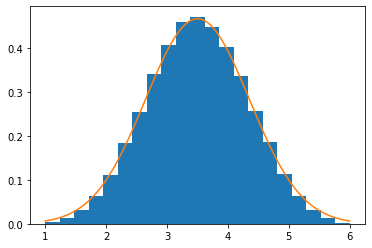

In [0]:
#Experimentos sobre el Teorema del Límite Central

import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import random

#EJEMPLO: Lanzamiento de un dado de 6 (v.a. discreta con dist. uniforme)

#Parámetros de la población
pop_mean = 3.5 #np.mean([1,2,3,4,5,6])
pop_sigma = 1.7078 #np.std([1,2,3,4,5,6])

#Parámetros del experimento
sample_size = 4
number_of_samples = 100000
sample_mean_vec = []

#Cálculo de la media de las muestras-------------------- 
for i in range(number_of_samples):
  uniform_sample = np.random.randint(1,6+1,sample_size)
  sample_mean_vec.append(np.mean(uniform_sample))
#-------------------------------------------------------

#Creación del histograma
plt.hist(sample_mean_vec,bins=np.linspace(1,6,5*sample_size+2), density=True)


#Distribución de las medias muestrales según el TLC
sigma = pop_sigma / np.sqrt(sample_size)
x = np.linspace(1, 6, 100)
plt.plot(x, norm.pdf(x, pop_mean, sigma))


plt.show()

In [0]:
import numpy as np
print(np.std([1,2,3,4,5,6]))
print(np.mean([1,2,3,4,5,6]))

1.707825127659933
3.5


### Ejemplo

Suponga que $X_i$ modela el tiempo de espera (en minutos) de un cliente $i$ a ser atendido en una sucursal. El asistente administrativo afirma que el promedio de tiempo de espera de la población entera de clientes es $\mu=2$ minutos. El gerente del lugar no cree en la afirmación de su asistente y por lo tanto, obeserva una muestra aleatoria de 36 clientes. El tiempo de espera promedio para esos 36 clientes es de 3.2 minutos ¿Debería el gerente rechazar la afirmación de su asistente (...y despedirlo)?

### Solución:

La función de distribución exponencial se suele usar para modelar el tiempo de espera de ocurrencia de un evento. Por lo tanto, es razonable suponer que $X_i$ es una variable aleatoria exponencial. Ahora, según la afirmación del asistente administrativo, la media de $X_i$ es:

$\mu = \theta =2$

De acuerdo, a las propiedades de la distribución exponencial, la varianza de $X_i$ es:

$\sigma^2=\theta^2=2^2=4$


Ahora, necesitamos saber lo siguiente: si la media $\mu$ realmente es 2 tal y como el asistente administrativo afirma, ¿Cuál es la probabilidad de que el gerente haya obtenido una media muestral 3.2 minutos o más?
De acuerdo con el teorema del límite central, la media muestral $\overline{x}$  presenta una distribución aproximadamente normal con media:

$\mu_{\overline{x}}=2$

y varianza:

$\sigma_{\overline{x}}^2 = \sigma^2/n=4/36=1/9$

Podemos entonces, calcular el valor $Z$ para nuestro punto de interés en la distribución:

$Z=\frac{3.2-2}{\sqrt{1/9}}=3.6$

y obtener la probabilidad $p(Z>3.6)$ usando la función de distribución acumulativa Gaussiana

In [0]:
import scipy.stats as st
1-st.norm.cdf(3.6)









0.00015910859015755285

Como $p(Z>3.6)=0.00016$ tan solo hay un $0.016$% de probabilidad de obtener una media muestral tan larga. Por lo tanto, sería razonable para el gerente rechazar la afirmación de su asistente de que la media $\mu=2$ y concluir que la media de la población es mayor a ese número.  Este es el tipo de ejemplos que veremos más adelante en las lecciones sobre prueba de hipótesis. En general, en el proceso de prueba de hipótesis, alguien realiza una afirmación (el asistente en este caso) y alguien recolecta y usa datos (el gerente en este caso) para tomar una decisión sobre la validez de la afirmación. En este caso en particular, usamos el TLC para tomar una decisión sobre la afirmación del asistente.



### Ejercicio

La persona promedio consume 2 litros de agua cuando se encuentra al aire libre (con una desviación estándar de 0.7 litros). Suponga que usted está organizando un campamento a Monteverde para 49 compañeros de trabajo y usted, y se planea llevar 110 litros de agua. ¿Cuál es la probabilidad de quedarse sin agua?

In [ ]:
#hacer el ejercicio de la normalidad


## Invervalos de confianza para los parámetros de una distribución


Se pueden distinguir principalmente dos tipos de métodos de inferencia estadística, usados respectivamente para:

1. **Estimación** de parámetros poblacionales

2. **Prueba de hipótesis** sobre tales parámetros

En módulos anteriores hemos estudiado métodos de inferencia estadística para la estimación del valor de parámetros poblacionales usando **estimadores puntuales** (un único número que es nuestro mejor aproximado del parámetro poblacional de interés). 
En esta sección, también estudiaremos métodos de inferencia estadística para la estimación de parámetros poblacionales, pero usando **intervalos de confianza**. Un intervalo de confianza es un rango de números, el cual con cierto grado de probabilidad o de "confianza", va a contener el valor del parámetro poblacional de interés. La probabilidad de que el intervalo realmente contenga el valor del parámetro poblacional es lo que llamamos **nivel de confianza** y al complemento del nivel de confianza le llamamos **error**. A continuación veremos un ejemplo de aplicación de intervalos de confianza.




### Ejemplo

Imagine que su equipo desarrolló un algoritmo de aprendizaje automático, el cual reportó una precisión media muestral $\overline{x}_a$ para una muestra $A=\left\{ a_{1},a_{2},\ldots,a_{n}\right\} $ de $n$ datos de validación.

Dado que el sistema se utilizará en producción con un nuevo conjunto de datos de validación  $A'$, su equipo necesita estimar qué tan **cercana
está la media muestral** $\overline{x}_{a}$ **de la media de
la población** $\mu$ (la media real de la precisión de su algoritmo).
Esto se puede expresar como la necesidad de estimar un intervalo en el cual sepamos que la media se encontrará con cierto **nivel de confianza** $1-\alpha$:

\begin{equation}
p\left\{ l\leq\mu\leq u\right\} =1-\alpha
\end{equation}

donde $l$ corresponde a la cota inferior del intervalo, $u$ corresponde a la cota superior del intervalo y $\alpha$ es el error. El intervalo de confianza se puede escribir como un margen de error alrededor de la media muestral $\overline{x} \pm\rho$, o bien como un intervalo $[\overline{x}-\rho,\overline{x}+\rho]$. A continuación veremos como construir intervalos de confianza para la media poblacional y como interpretarlos.

### Intervalos de confianza para $\mu$, con $\sigma$ conocido
Usando el teorema del límite central, nos interesa encontrar el intervalo en el cual la media poblacional $\mu$ esté contenida
con cierto error, por ejemplo $\alpha=0.05.$ Esto significa que el nivel de confianza será de $1-\alpha=0.95$. En caso de conocer el valor $\sigma$ para la población, se puede calcular el intervalo de confianza usando la siguiente fórmula: 

\begin{equation}
\overline{x}\pm\sigma_{\overline{x}}\, z_{\alpha/2},
\end{equation}

donde $z_{\alpha/2}$ corresponde al punto en la distribución $Z$ en el que la función de distribución probabilidad acumulativa es igual a  $(1 - \alpha/2)$, o bien, al valor absoluto del punto en la distribución $Z$ en el que la función de distribución probabilidad acumulativa es igual a  $(\alpha/2)$.

![](imagen3.png)

Dado que conocemos la desviación estándar de la población $\sigma$, podemos sustituir $\sigma_{\overline{x}}=\sigma/\sqrt n$, y obtener:

\begin{equation}
\overline{x}\pm\frac{\sigma\, z_{\alpha/2}}{\sqrt{n}}
\end{equation}

Para el caso específico de $\alpha=0.05$, tendríamos que $z_{0.025}=1.96$ y por lo tanto:

\begin{equation}
\overline{x}\pm\frac{1.96\sigma}{\sqrt{n}}
\end{equation}

Observe entonces como el intervalo de confianza $1-\alpha$ ha sido definido en términos de de la desviación estándar de la población $\sigma$ y el tamaño de la muestra $n$. Sin embargo, contar con la información de la desviación estándar de la población es poco usual y no es posible en  la mayoría de casos
prácticos. Por esta razón en la siguiente sección veremos como calcular el intervalo de confianza cuando desconocemos $\sigma$.

### Intervalos de confianza para $\mu$, con $\sigma$ desconocido: la distribución $t$ student

Cuando la desviación estándar de la población $\sigma$ es desconocida,
es necesario tomar una suposición sobre de la distribución de $X$. Una suposición frecuentemente razonable es asumir la distribución como **normal**.
De no ser adecuada tal suposición, es necesario utilizar métodos no parámetricos, los cuales se estudiarán más adelante.

Siguiendo adelante con la suposición de la normalidad de la variable
aleatoria $X$, con un $\overline{x}$ como la media muestral y $s$ como la desviación estándar muestral de un conjunto $X_{n}$ de $n$
observaciones, con $X=\left\{ x_{1},x_{2},\ldots,x_{n}\right\}$, una forma, un tanto obvia, de calcular el intervalo de confianza sería reemplazando $\sigma$ por la desviación estándar muestral $s$:

\begin{equation}
\overline{x}\pm\frac{s\, z_{\alpha/2}}{\sqrt{n}}
\end{equation}

Pero, ¿Cuál es el efecto de cambiar $\sigma$ por $s$? Si $n\rightarrow\infty$,
el efecto será evidentemente nulo, sin embargo, en ingeniería y ciencias de los datos, el tamaño de la muestra $n$ es usualmente pequeño (Al menos en comparación con el tamaño de la población). Por esta razón,  al tener que estimar la desviación estándar de la población agregamos un error extra a nuestro cálculo, el cual compensamos usando una distribución distinta, la cual puede *ajustarse* mejor para cada tamaño de muestra $n$. La distribución *t* o *t student* define el parámetro $k=n-1$, el cual a medida que $k$ se hace más pequeño, sube las probabilidades de
los valores en los extremos (colas más gruesas), reflejando la mayor *imprecisión* que se tiene al usar
un tamaño de muestra más pequeño. Complementariamente, a medida
que $k\rightarrow\infty$, la distribución *t student* tiende
a una distribución normal con media cero y desviación estándar 1, como lo muestra la siguiente figura:

![](imagen4.png)


La función de densidad de probabilidad de la distribución *t
student* está dada por:

\begin{equation}
p\left(t\right)=\frac{\Gamma\left(\frac{k+1}{2}\right)}{\sqrt{k\pi}\Gamma\left(\frac{k}{2}\right)}\left(1+\frac{t^{2}}{k}\right)^{-\frac{k+1}{2}}
\end{equation}

donde se define la función gamma como $\Gamma\left(n\right)=\left(n-1\right)!$. De esta forma, el valor de $t$ a evaluar dependerá del tamaño de
la muestra $k=n-1$. Por lo tanto, calculamos el intervalo de confianza como:

\begin{equation}
\overline{x}\pm\frac{s\, t_{k,\alpha/2}}{\sqrt{n}}
\end{equation}


donde $-t_{k,\alpha/2}$  corresponde al punto en la distribución $t$ con $k$ grados de libertad, en el que la función de distribución probabilidad acumulativa es igual a  $\alpha/2$. También podemos expresar el intervalo de confianza como:


\begin{equation}
\Rightarrow p\left\{ \overline{x}-\frac{s\,t_{k,\alpha/2}}{\sqrt{n}}\leq\mu\leq\overline{x}+\frac{s\,t_{k,\alpha/2}}{\sqrt{n}}\right\} =1-\alpha
\end{equation}

In [0]:
import scipy.stats as st

#Standard Normal distribution-------------------------

#Percent Point Function (Inverse of CDF)
print(st.norm.ppf(.975))
print(st.norm.ppf(.025))

#Cumulative distribution function
#print(st.norm.cdf(1.9599))

#-----------------------------------------------------



#T-student distribution-------------------------------

print(st.t.ppf(.975,30-1))
print(st.t.ppf(.025,30-1))
#print(st.t.cdf(2.326,100000))

#-----------------------------------------------------

1.959963984540054
-1.9599639845400545
0.9749962601845973
2.045229642132703
-2.0452296421327034


Es importante resaltar que para el cálculo correcto de los intervalos de confianza, las muestras deben de ser aleatorias.

# Pruebas de normalidad
Muchos algoritmos de aprendizaje automático y análisis estadísticos
como el ANOVA, suponen una distribución Gaussiana de los datos. Es
por ello que esta suposición debe ser verificada antes de utilizar
este tipo de técnicas, de lo contrario habrá que utilizar otras basadas
en métodos no paramétricos. Existen muchos tipos de pruebas de normalidad,
que van desde verificar gráfica y cualitativamente la similitud de una distribución empírica con el modelo normal basado en histogramas
o *box-plots*, hasta técnicas más formales como por ejemplo el
método de Kolgomorov-Smirnov, planteado por matemáticos soviéticos
en los años 30's, y su posterior mejora, la prueba de **Lilliefors**
y otras técnicas más modernas y más certeras para muestras de distintos
tamaños, como el método de la inclinación-kurtosis (conocida también
como prueba de Jarque-Bera), o las pruebas de **Shapiro-Wilk**,
o de **Anderson-Darling**.

## Prueba de normalidad de Kolmogorov-Smirnov

La prueba de Kolmogorov-Smirnov (Prueba K-S) compara los datos de una muestra respecto a una distribución conocida y nos permite saber si los datos provienen de esa distribución. La aplicación más usual de esta prueba es respecto a la distribución normal, pues muchos métodos estadísticos requieren que los datos provengan de una distribución normal. Sin embargo, la prueba se puede aplicar para otras distribuciones.

Las hipótesis para esta prueba son las siguientes:

- Hipótesis nula ($H_0$): los datos provienen de la distribución especificada.

- Hipótesis alternativa ($H_1$): al menos un valor no concuerda con la distribución especificada.

El primer paso para realizar la prueba consiste en obtener una función de distribución de probabilidad acumulativa empírica $F_e\left(x\right)$ a partir de los datos de una muestra $X=\left\{x_1,x_2,...,x_n \right\}$. El cálculo de $F_e\left(x\right)$ se haría de la siguiente forma:

\begin{equation}
F_e\left(x\right)=\frac{1}{n}\sum_{i=1}^{n}I\left(x_i\leq x\right),
\end{equation}

donde la función $I$ es la función indicadora o indicatriz, la cual indica si
el valor $x_{i}$ es menor o igual a $x$:

\begin{equation}
I\left(x_i\leq x\right)=\begin{cases}
1 & \textrm{si }x_{i}\leq x\\
0 & \textrm{sino}
\end{cases}
\end{equation}

Luego se especifica una función de distribución de probabilidad acumulativa ideal $F_i(x)$ que corresponde a la distribución conocida de la cual se quiere saber si los datos provienen.  El cálculo de la distribución ideal $F_i(x)$ **implica que, para el caso de probar la normalidad de un conjunto de datos $X$,
es necesario conocer los parámetros** $\theta=\left\{\mu,\sigma\right\}$
, o en su defecto, estimarlos.

Una vez que se tienen la función de distribución de probabilidad acumulativa empírica $F_e\left(x\right)$ y la función de distribución de probabilidad acumulativa ideal $F_i(x)$, se calcula la distancia entre ambas como: 

\begin{equation}
D=\max\left|F_e(x)-F_i(x)\right|
\end{equation}

De esta forma, el método de Kolgomorov-Smirnov busca la diferencia máxima (distancia vertical) entre las distribuciones de probabilidad acumulativa, como lo ilustra la siguiente figura:

![](imagen5.png)

Tomando en cuenta el tamaño de la muestra $n$ y el error $\alpha$ definido para la prueba, se puede comparar el valor obtenido $D$ con el valor  crítico correspondiente de la tabla de la distribución de Kolgomorov:

![](imagen6.png)

Si $D$ es mayor que el valor crítico, 
**la hipótesis nula $H_0$ se rechaza**, de lo contrario se acepta (se supone como cierta).

## Ejemplo de código
El siguiente ejemplo ejecuta una prueba KS para el histograma $\vec{h}$ de ejemplo presentado.

In [1]:
from numbers import Number

import torch
from torch.distributions import Exponential
from torch.distributions import Uniform
from torch.distributions import Normal
from torch.distributions.exp_family import ExponentialFamily
from torch.distributions.utils import broadcast_all
import numpy as np
import matplotlib.pyplot as plt

#Ocurrences
histogram = torch.tensor([8.0, 25, 88, 172, 243, 252, 144, 49, 13, 6])
#values
histogramX = torch.tensor([50.0,	 150,	 250,	 350,	 450,	 550,	 650,	 750,	 850, 950])

#number of observations
n = histogram.sum()
histogramNorm = histogram / n        #Norm factor for mean
histogramNorm2 = histogram / (n - 1) #Norm factor for std

#calculate cumulative sum
cdfEmpirical = torch.cumsum(histogramNorm, dim = 0)

#get sample stats
meanHist = (histogramX * histogramNorm).sum()
stdHist = torch.sqrt((histogramNorm2 * (histogramX - meanHist) ** 2).sum())

#Create ideal CDF
normalDensity = Normal(meanHist, stdHist)
cdfNormalIdeal = normalDensity.cdf(histogramX) #points used to evaluate cdf

#Compare the empirical and ideal distributions
difference = torch.abs(cdfNormalIdeal - cdfEmpirical)
dn = torch.max(difference)

print(1.3581 / np.sqrt(n)) #valor critico
print(n)
print(cdfNormalIdeal)
print(cdfEmpirical)
print(dn)


tensor(0.0429)
tensor(1000.)
tensor([0.0027, 0.0164, 0.0679, 0.1986, 0.4198, 0.6708, 0.8614, 0.9583, 0.9912,
        0.9987])
tensor([0.0080, 0.0330, 0.1210, 0.2930, 0.5360, 0.7880, 0.9320, 0.9810, 0.9940,
        1.0000])
tensor(0.1172)


El valor $D$ obtenido es probado con una confianza de $1-\alpha = 0.95$, entonces utilizando la tabla de la distribución Kolgomorov (tabla KS), podemos verificar que $D > D_{n,\alpha}$ que, para este caso, vemos que $0.1172 > 0.0429$.

Esto quiere decir que la hipótesis nula $H_0$ que plantea que el histograma  $\vec{h}$ ha sido generado de una distribución nomal, se  rechaza. En caso de que el valor $D$ hubiese sido menor se asume como cierta o en otras palabras, no se tendría la suficiente evidencia como para demostrar lo contrario. Para obtener los valores críticos de la tabla KS en Python se puede usar la siguiente función del paquete scipy.

In [2]:
from scipy.stats import ksone
print(ksone.ppf(0.975,1000))

0.04277658868221006


Las principales ventajas del método de Kolgomorov son:
1. No requiere que los datos provengan de alguna distribución en particular.
2. La distancia $D$ es fácil de calcular.
3. Funciona con tamaños de muestra pequeños.

Las desventajas del método de Kolgomorov incluyen la necesidad de conocer los parámetros de la distribución $\theta$ a priori, además de la poca sensibilidad en las *colas* de la función de densidad al comparar distribuciones. Otros métodos
como la prueba de Lilliefors, basado en la prueba de Kolgomorov, no necesitan conocer los parámetros de la distribución ideal $\theta$.